In [ ]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import psutil
import GPUtil





# Create a new figure with 4 subplots stacked vertically
fig, axs = plt.subplots(4, 1, figsize=(12, 6))

# Set the height of each subplot to 1.5 inches
fig.subplots_adjust(hspace=0.5)

# Iterate over the subplots
for ax in axs:
    # Generate random data
    data = np.random.rand(5)

    # Plot the data in the current subplot
    ax.plot(data)

# Show the figure
plt.show()







# Initialize lists to store data
timestamps, cpu_data, memory_data, gpu_memory_data, gpu_utilization_data = [], [], [], [], []

interval = 1 # Set the interval in seconds for data collection

# Create the figures and axes for plotting
fig_cpuutil, ax_cpuutil = plt.subplots(figsize=(12, 1.5)); plt.grid(True, which='both')
fig_memoryu, ax_memoryu = plt.subplots(figsize=(12, 1.5)); plt.grid(True, which='both')
fig_gpumemo, ax_gpumemo = plt.subplots(figsize=(12, 1.5)); plt.grid(True, which='both')
fig_gpuutil, ax_gpuutil = plt.subplots(figsize=(12, 1.5)); plt.grid(True, which='both')

# Start the data collection loop
i = 0
while (True):
    
    timestamp = i + 1
    
    cpu_percent = psutil.cpu_percent(interval=None)
    memory_usage = psutil.virtual_memory().used / (1024 ** 3)  # in GB #.virtual_memory().percent
    gpus = GPUtil.getGPUs()
    gpu_memory = [gpu.memoryUsed for gpu in gpus][1]
    gpu_utilization = [gpu.load for gpu in gpus][1] *100

    # Add the data to the lists
    timestamps.append(timestamp)
    cpu_data.append(cpu_percent)
    memory_data.append(memory_usage)
    gpu_memory_data.append(gpu_memory)
    gpu_utilization_data.append(gpu_utilization)
    
    keepthelastn = 3
    
    timestamps = timestamps[-keepthelastn:]
    cpu_data = cpu_data[-keepthelastn:]
    memory_data = memory_data[-keepthelastn:]
    gpu_memory_data = gpu_memory_data[-keepthelastn:]
    gpu_utilization_data = gpu_utilization_data[-keepthelastn:]

    # Clear the previous plots
    # clear_output(wait=True) ######################################## 
    
    # Remove data already added to the axes
    ax_cpuutil.clear()
    ax_memoryu.clear()
    ax_gpumemo.clear()
    ax_gpuutil.clear()
    
    # Plot the CPU utilization
    ax_cpuutil.plot(timestamps, cpu_data, label='CPU', color='orange')
    ax_cpuutil.set_title('CPU Utilization [%]')
    ax_cpuutil.yaxis.set_major_locator(plt.MaxNLocator(7))
    ax_cpuutil.set_yticklabels(['{:03.0f}'.format(x) for x in ax_cpuutil.get_yticks()])

    # Plot the memory usage
    ax_memoryu.plot(timestamps, memory_data, label='Memory', color='red')
    ax_memoryu.set_title('Memory Usage [GB]')
    ax_memoryu.yaxis.set_major_locator(plt.MaxNLocator(7))
    ax_memoryu.set_yticklabels(['{:03.0f}'.format(x) for x in ax_memoryu.get_yticks()])
    
    # Plot the GPU memory
    ax_gpumemo.plot(timestamps, gpu_memory_data, label='GPU Memory', color='green')
    ax_gpumemo.set_title('GPU Memory [GB]')
    ax_gpumemo.yaxis.set_major_locator(plt.MaxNLocator(7))
    ax_gpumemo.set_yticklabels(['{:03.0f}'.format(x) for x in ax_gpumemo.get_yticks()])

    # Plot the GPU utilization
    ax_gpuutil.plot(timestamps, gpu_utilization_data, label='GPU Utilization', color='black')
    ax_gpuutil.set_xlabel('Time')
    ax_gpuutil.set_title('GPU Utilization')
    ax_gpuutil.yaxis.set_major_locator(plt.MaxNLocator(7))
    ax_gpuutil.set_yticklabels(['{:03.0f}'.format(x) for x in ax_gpuutil.get_yticks()])    

    # Show the plots
    display(fig_cpuutil); display(fig_memoryu); display(fig_gpumemo); display(fig_gpuutil)
    
    # Wait for the specified interval
    time.sleep(interval)
    i += 1

# Close the plots
plt.close(fig_cpuutil); plt.close(fig_memoryu); plt.close(fig_gpumemo); plt.close(fig_gpuutil)


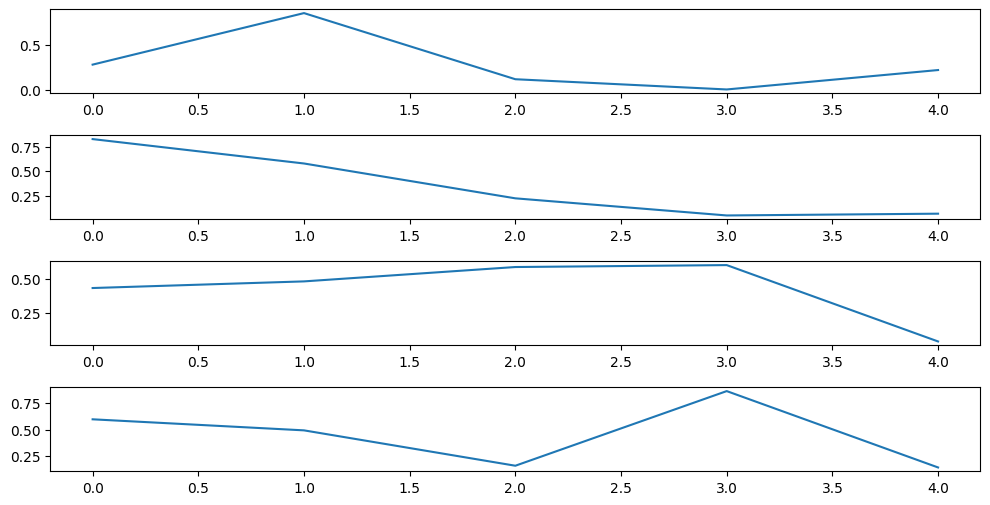

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Create a new figure with 4 subplots stacked vertically
fig, axs = plt.subplots(4, 1, figsize=(12, 6))

# Set the height of each subplot to 1.5 inches
fig.subplots_adjust(hspace=0.5)

# Iterate over the subplots
for ax in axs:
    # Generate random data
    data = np.random.rand(5)

    # Plot the data in the current subplot
    ax.plot(data)

# Show the figure
plt.show()


In [83]:
import GPUtil
GPUtil.showUtilization()

| ID | GPU | MEM |
------------------
|  0 |  0% | 69% |
|  1 |  0% |  0% |
|  2 | 78% | 97% |
|  3 |  0% |  8% |


[0.0, 14.0]
[0.0, 36.0]
[0.0, 1.0]
[0.0, 3.0]


/tmp/ipykernel_110642/3434391939.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:6.2f}'.format(x) for x in ax.get_yticks()])


KeyboardInterrupt: 

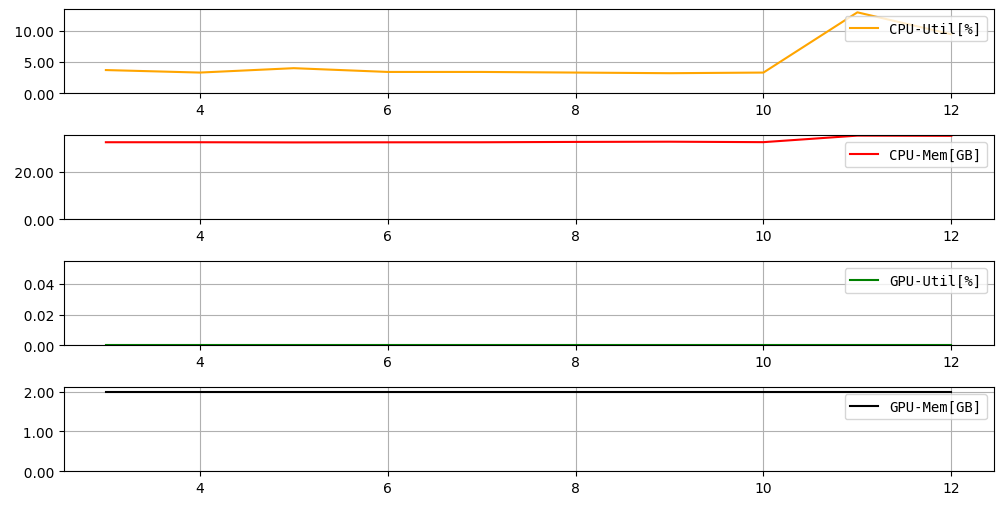

In [188]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import psutil
import GPUtil
from matplotlib.font_manager import FontProperties

fig, axs = plt.subplots(4, 1, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)
fixed_width_font = FontProperties(family='monospace')

# Initialize lists to store data
timestamps, cpu_data, memory_data, gpu_memory_data, gpu_utilization_data = [], [], [], [], []

interval = 1 # Set the interval in seconds for data collection

# Start the data collection loop
i = 0
while (True):
    
    timestamp = i + 1
    
    cpu_percent = psutil.cpu_percent(interval=None)
    memory_usage = psutil.virtual_memory().used / (1024 ** 3)  # in GB #.virtual_memory().percent
    gpus = GPUtil.getGPUs()
    gpu_memory = [gpu.memoryUsed for gpu in gpus][1]
    gpu_utilization = [gpu.load for gpu in gpus][1] *100

    # Add the data to the lists
    timestamps.append(timestamp)
    cpu_data.append(cpu_percent)
    memory_data.append(memory_usage)
    gpu_memory_data.append(gpu_memory)
    gpu_utilization_data.append(gpu_utilization)
    
    keepthelastn = 10
    
    timestamps = timestamps[-keepthelastn:]
    cpu_data = cpu_data[-keepthelastn:]
    memory_data = memory_data[-keepthelastn:]
    gpu_memory_data = gpu_memory_data[-keepthelastn:]
    gpu_utilization_data = gpu_utilization_data[-keepthelastn:]

    # Clear the previous plots
    clear_output(wait=True) ########################################
    
    DATAX = [cpu_data, memory_data, gpu_utilization_data, gpu_memory_data]
    LABEL = ['CPU-Util[%]', 'CPU-Mem[GB]', 'GPU-Util[%]', 'GPU-Mem[GB]']
    # LABEL = ['CPU', 'Memory', 'GPU Memory', 'GPU Utilization']
    COLOR = ['orange', 'red', 'green', 'black']
    LIMIT = [[0,100],[0,1000],[0,100],[0,80]]
    # TITLE = ['CPU Utilization [%]', 'Memory Usage [GB]', 'GPU Memory [GB]', 'GPU Utilization [%]']
    
    # Iterate over the subplots
    for k, ax in enumerate(axs):

        # ax.set_title(TITLE[k])
        ax.clear() # Remove data already added to the axes
        ax.plot(timestamps, DATAX[k], color=COLOR[k], label=LABEL[k])
        # ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        
        
        
        # if i>3: ax.set_ylim('auto')
        
        
        
        
        ax.set_ylim(LIMIT[k][0], None) ##########################
        
        ax.legend(prop=fixed_width_font, loc='upper right')
        
        # # Remove spines
        # ax.spines['left'].set_visible(False)
        # ax.spines['right'].set_visible(False)
        # ax.spines['top'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        
        KLIMIT = [np.ceil(x) for x in ax.get_ylim()]
        print(KLIMIT)
        
        # Create evenly spaced gridlines
        x_ticks = timestamps
        y_ticks = np.linspace(KLIMIT[0], KLIMIT[1], num=6)
        # y_ticks = np.arange(KLIMIT[0], KLIMIT[1]+1, (KLIMIT[1]-KLIMIT[0])/5)
        # ax.set_xticks(x_ticks)
        # ax.set_yticks(y_ticks)
        # ax.hlines(y_ticks, -0.5, len(data)-0.5, colors='lightgray', linewidth=0.5)
        # ax.vlines(x_ticks, 0, 100, colors='lightgray', linewidth=0.5)
        # np.append(x_ticks,2)
        # np.insert(x_ticks,0,8)
    
        ax.grid(True, which='both') ################################
        ax.set_yticklabels(['{:6.2f}'.format(x) for x in ax.get_yticks()])
        # ax_gpuutil.set_xlabel('Time')

    # Show the plots
    # display(fig_cpuutil); display(fig_memoryu); display(fig_gpumemo); display(fig_gpuutil)
    display(fig)
    # Show the figure
    # plt.show() 
        
    # Wait for the specified interval
    time.sleep(interval)
    i += 1

# Close the plots
# plt.close(fig_cpuutil); plt.close(fig_memoryu); plt.close(fig_gpumemo); plt.close(fig_gpuutil)


    # # Set the y-axis limits to auto
    # ax.set_ylim('auto')

    # # Print the y-axis limits
    # print(f"Subplot {i+1} y-axis limits: {ax.get_ylim()}")

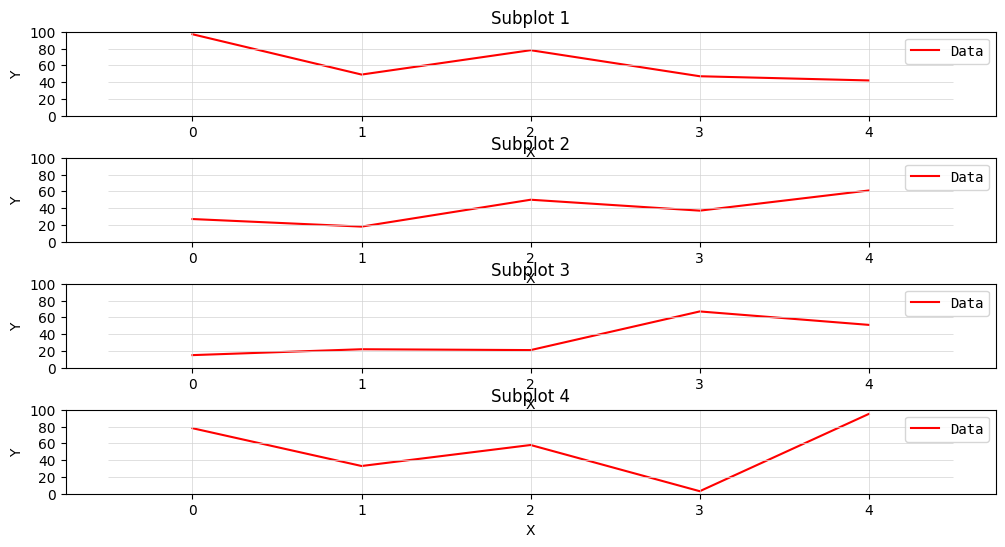

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Create a new figure with 4 subplots stacked vertically
fig, axs = plt.subplots(4, 1, figsize=(12, 6))

# Set the height of each subplot to 1.5 inches
fig.subplots_adjust(hspace=0.5)

# Define a fixed-width font for the legend
fixed_width_font = FontProperties(family='monospace')

# Iterate over the subplots
for i, ax in enumerate(axs):
    # Generate random data
    data = np.random.randint(0, 100, size=5)

    # Set the title of the subplot
    ax.set_title(f'Subplot {i+1}')

    # Set the plot color and label
    ax.plot(data, color='red', label='Data')

    # Set the x and y labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Set the legend font to fixed-width and position to top right
    ax.legend(prop=fixed_width_font, loc='upper right')

    # Set the y-axis limits to [0, 100]
    ax.set_ylim(0, 100)

    # Remove spines
    # ax.spines['left'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)

    # Create evenly spaced gridlines
    x_ticks = np.arange(len(data))
    y_ticks = np.arange(0, 101, 20)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)
    ax.hlines(y_ticks, -0.5, len(data)-0.5, colors='lightgray', linewidth=0.5)
    ax.vlines(x_ticks, 0, 100, colors='lightgray', linewidth=0.5)
    # np.append(x_ticks,2)
    # np.insert(x_ticks,0,8)

# Show the figure
plt.show()

